# GloVe

### 1. What is GloVe?
GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.

### 2. Word Embeddings - TF-IDF vs GloVe
Word embeddings is the process by which words are transformed into vectors of real numbers. One kind of word embedding technique that we have seen in this course this semester is TF-IDF which creates a sparse vector by counting the occurence of a word in a single document as well as in relation to the entire document which allows us to determne how important a word is in a given document. This follows a Bag of Words model where the count of a particular word matters more than where it occurs or the co-occurences between words.

GloVe is another type of word embedding technique that forms a dense vector that captures word-word co-occurences which extract the meaning rather then just the frequency. The idea behind it is that a certain word generally co-occurs more often with one word than another. 

GloVe is a log-bilinear model with a weighted least-squares objective. The main intuition is that the ratios of word-word co-occurrence probabilities can encode some form of meaning.

### 3. Tutorial Details 
This tutorial uses the data provided in HW1 with topic names and definitions to visualize how closely the tokens are related to each other. 

We use a pretrained GloVe model which provides us with a dictionary where key is the token and the value is the vector representing the embeddings of the word. The GloVe model is trained on the non-zero entries of a global word-word co-occurrence matrix, which tabulates how frequently words co-occur with one another in a given corpus. Populating this matrix requires a single pass through the entire corpus to collect the statistics. For large corpora, this pass can be computationally expensive, but it is a one-time up-front cost. 


The model used for pretraining can be downloaded from [here.](https://nlp.stanford.edu/projects/glove/)

The below code loads the model from the mentioned location and adds all the tokens and their corresponding embeddings to embeddings_index dictionary.

In [3]:
embeddings_index = {}
import numpy as np
#Load data from downloaded file
f = open('glove.840B.300d/glove.840B.300d.txt')
for line in f:
    values = line.split(' ')
    word = values[0] 
    coefs = np.asarray(values[1:], dtype='float32') 
    embeddings_index[word] = coefs
f.close()

print('GloVe data loaded')


GloVe data loaded


In [96]:
print("Tokens in Embeddings Dictionary")
print(list(embeddings_index.keys())[0:50])

Tokens in Embeddings Dictionary
[',', '.', 'the', 'and', 'to', 'of', 'a', 'in', '"', ':', 'is', 'for', 'I', ')', '(', 'that', '-', 'on', 'you', 'with', "'s", 'it', 'The', 'are', 'by', 'at', 'be', 'this', 'as', 'from', 'was', 'have', 'or', '...', 'your', 'not', '!', '?', 'will', 'an', "n't", 'can', 'but', 'all', 'my', 'has', '|', 'do', 'we', 'they']


### 4. Text Preprocessing

We preprocess the dataset in the same way as we have done for HW1 and filter out these token from the vast set of tokens output by the pretrained GloVe model. 

Note : We do not use stemming here as the GloVe pretrained model outputs the tokens without stemming and we can filter out the embeddings of the tokens without stemming the tokens of our dataset.


In [105]:
# configuration options
remove_stopwords = True 
use_stemming = False
remove_otherNoise = True 


filepath = 'homework_1_data.txt'
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
ps = PorterStemmer();
from nltk.tokenize import word_tokenize
definition_array=[];
query_array=[];

def_index_dict={};
query_index_dict={};
doc_id_dict={};
entity_id_dict={};

#split each string based on tabs
with open(filepath) as fp:
    line = fp.readline()
    while line:
        #re.split(r'\t+', line.rstrip('\t'))
        split_str = line.split("\t");
        definition=split_str[2];
        query=split_str[0];
        query_array.append(query);
        entity_id_dict[split_str[1]]=query;
        definition_array.append(definition);
        line = fp.readline();

def_all=[];
query_all=[];


new_index_dict={};
def_all=[];
#parser function that outputs tokens based on the parameters remove_stopwords,use_stemming,remove_otherNoise.
def parser(remove_stopwords,use_stemming,remove_otherNoise,current,doc_id,def_or_query,return_array=None):
    query_index_dict={}
    #parse definition
    if(def_or_query=="parse_def"):
        definitions=[];
        #punctuation and spaces
        definitions=re.findall(r"[\w']+|[.,!?;]",current);
        #remove stopwords
        if(remove_stopwords== True):
            new_def=[];
            for w in definitions: 
                if w not in stop_words: 
                    new_def.append(w);
            definitions=new_def;
        #stem words
        if(use_stemming==True):
            new_def2=[];
            for w in definitions:
                new_def2.append(ps.stem(w));
            definitions=new_def2;
        #remove noise-take tokens that are only alphanumeric
        if(remove_otherNoise==True):
            new_def3=[];
            for w in definitions:
                if(w.isalnum()):
                    new_def3.append(w);
            definitions=new_def3;
        for d in definitions:
            if(d not in def_all):
                def_index_dict[d]=[];
                def_all.append(d);
            if(doc_id not in def_index_dict[d]):
                temp=def_index_dict[d];
                temp.append(doc_id);
                def_index_dict[d]=temp;
        
            
        doc_id_dict[doc_id]=definitions;
        
doc_id=0
#Parse definitions
for definition in definition_array:
    parser(remove_stopwords,use_stemming,remove_otherNoise,definition,doc_id,"parse_def");
    doc_id=doc_id+1;

print("Preprocessing done. A dictionary where key:doc_id and value:array of words in the document is created")
doc_id=1;

for i in range(0,10):
    print(doc_id_dict[i])


Preprocessing done. A dictionary where key:doc_id and value:array of words in the document is created
['estimates', 'duration', 'cost', 'made', 'component', 'separately', 'combined', 'provide', 'overall', 'figure']
['pattern', 'process', 'deductive', 'approach', 'use', 'understanding', 'processes', 'predict', 'patterns', 'emerge', 'individual', 'agent', 'based', 'models', 'macroscopic', 'emergent', 'patterns', 'micro', 'level', 'behaviors']
['normalization', '3nf']
['client', 'factor', 'standpoint']
['approach', 'dynamic', 'programming', 'problems', 'problems', 'solution', 'composed', 'solutions', 'problem', 'smaller', 'inputs']
['piecing', 'together', 'systems', 'give', 'rise', 'complex', 'system']
['piecing', 'together', 'systems', 'give', 'rise', 'grander', 'system']
['begins', 'looking', 'processes', 'directly', 'activity', 'level', 'aggregates', 'identified', 'processes', 'across', 'organization']
['begins', 'level', 'attributes', 'normalization', 'bottom', 'used', 'small', 'datab

In [106]:
glove_array_words=[];
#Put all the tokens extracted from HW1 dataset into an array
for doc_id in doc_id_dict:
    for i in range(0,len(doc_id_dict[doc_id])):
        glove_array_words.append(doc_id_dict[doc_id][i])
print("Tokens from HW1 Dataset:")
print(glove_array_words[0:100])
glove_array_words=list(set(glove_array_words));

Tokens from HW1 Dataset:
['estimates', 'duration', 'cost', 'made', 'component', 'separately', 'combined', 'provide', 'overall', 'figure', 'pattern', 'process', 'deductive', 'approach', 'use', 'understanding', 'processes', 'predict', 'patterns', 'emerge', 'individual', 'agent', 'based', 'models', 'macroscopic', 'emergent', 'patterns', 'micro', 'level', 'behaviors', 'normalization', '3nf', 'client', 'factor', 'standpoint', 'approach', 'dynamic', 'programming', 'problems', 'problems', 'solution', 'composed', 'solutions', 'problem', 'smaller', 'inputs', 'piecing', 'together', 'systems', 'give', 'rise', 'complex', 'system', 'piecing', 'together', 'systems', 'give', 'rise', 'grander', 'system', 'begins', 'looking', 'processes', 'directly', 'activity', 'level', 'aggregates', 'identified', 'processes', 'across', 'organization', 'begins', 'level', 'attributes', 'normalization', 'bottom', 'used', 'small', 'databases', 'attributes', 'often', 'intuitive', 'approach', 'used', 'recursion', 'dynamic'

### 5. Filtering 

Now, we filter the tokens that we need, that is the tokens that are a part of our dataset from the tokens obtained from the pretrained model.

In [107]:
print("Tokens obtained from pretrained model: "+format(len(embeddings_index)));
new_embed_dict={};
#Filter out tokens from embeddings_index
for i in range(0,len(glove_array_words)):
    try:
        new_embed_dict[glove_array_words[i]]=embeddings_index[glove_array_words[i]];
    except:
        new_embed_dict[glove_array_words[i]]=[];
print("Tokens after filtering: "+format(len(new_embed_dict)));
print("Example tokens and their embeddings shown:")
keys=list(new_embed_dict.keys())[0:2]
for i in range(0,len(keys)):
    print(keys[i]);
    print(new_embed_dict[keys[i]]);

Tokens obtained from pretrained model: 2196016
Tokens after filtering: 15744
Example tokens and their embeddings shown:
south
[ 3.0233e-01  1.0602e-01  3.4486e-01 -1.7187e-01  1.1376e+00  1.2113e-01
 -4.4904e-01  5.8672e-01  1.2389e-01  2.7719e+00 -4.8481e-01 -1.0983e-01
  2.7575e-01 -2.7715e-01 -2.8142e-01 -4.1233e-02  1.6334e-01  1.3552e+00
  5.0799e-01 -2.7932e-01  3.5309e-01  3.7836e-01  5.3228e-01 -5.8108e-04
 -1.2489e-02 -4.4130e-01 -6.0205e-02 -1.3591e-01 -1.5055e-01  4.0398e-01
  3.7536e-01  4.6984e-01 -2.6681e-01  2.4657e-02 -4.6052e-01  7.8195e-02
 -3.1437e-01  6.5725e-02 -4.1573e-01 -2.8379e-02 -4.1889e-01  8.0712e-02
  4.8615e-01  4.4394e-03  1.6153e-01 -3.2498e-02  2.6039e-01 -2.9447e-01
 -5.2268e-01 -2.9064e-01  1.3021e-01  2.3819e-01 -1.6416e-01  7.7372e-02
  1.5120e-01  4.7038e-01 -9.3803e-02  2.4088e-01 -4.7686e-02  2.0386e-01
 -2.6520e-01 -9.1300e-02  1.9710e-01  8.2668e-01 -1.2207e-02  2.8575e-01
  1.0221e-01  3.6869e-01  1.4288e-01  2.5073e-01 -4.1226e-01  1.8670e-0

### 6. TSNE
We use a tool called TSNE to visualize this high dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the difference between the joint probabilities of the low-dimensional embedding and the high-dimensional data. 

And we use fit-transform to fit these vectors into an embedded space and return that transformed output.

In [108]:
from sklearn.manifold import TSNE
#Load TSNE
tsne=TSNE(n_components=2, random_state=0);
words= list(embeddings_index.keys());
vectors=[embeddings_index[word] for word in words];

In [109]:
#Fit the vectors
Y = tsne.fit_transform(vectors[:1000])

### 7.Plot

The below scatter plot shows the tokens plotted according to their embeddings obtained from the pretrained model. The plot can be interpreted as follows:

The words/tokens that are relatively closer to each other on the plot can be said to be more similar to each other than the words that are not. In other words, the cosine similarity between these words closer to 1. 

The three subsequent plots show the words from 0-50,50-100,100-150 plotted using TSNE. Similarly, a graph can be plotted using any combinations based on the need to visualize the similarities between them. 

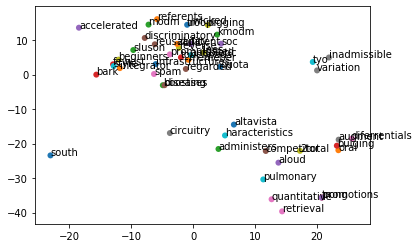

In [110]:
import matplotlib.pyplot as plt
ax = plt.subplots()
words=list(new_embed_dict.keys());
words=words[0:50]
for w, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.scatter(x, y, label=w, edgecolors='none')
    plt.annotate(w, xy=(x, y), xytext=(0, 0), textcoords="offset points")

plt.show()


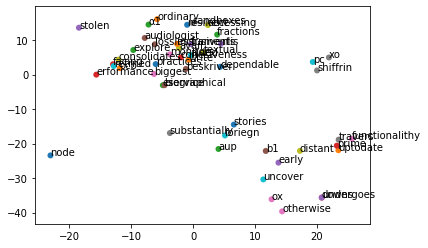

In [111]:
import matplotlib.pyplot as plt
ax = plt.subplots()
words=list(new_embed_dict.keys());
words=words[50:100]
for w, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.scatter(x, y, label=w, edgecolors='none')
    plt.annotate(w, xy=(x, y), xytext=(0, 0), textcoords="offset points")

plt.show()

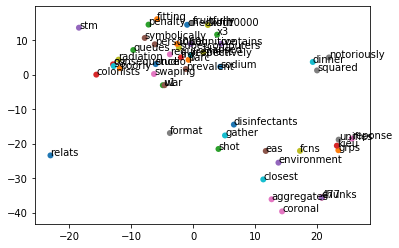

In [112]:
import matplotlib.pyplot as plt
ax = plt.subplots()
words=list(new_embed_dict.keys());
words=words[100:150]
for w, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.scatter(x, y, label=w, edgecolors='none')
    plt.annotate(w, xy=(x, y), xytext=(0, 0), textcoords="offset points")

plt.show()

### 8.Conclusion

In this way, a pretrained GloVe model can be easily used to load the vector embeddings of words which encode the co-occurances of words. This type of information can prove to be important to certain NLP tasks compared to a simple Bag of Words model as this kind of representation captures the meaning of the words, semantic relationships and the contexts that they are used in.

### 9. References
* [Word Embeddings](https://towardsdatascience.com/understanding-word-embeddings-with-tf-idf-and-glove-8acb63892032)
* [Loading Pretrained Model](https://blog.ekbana.com/loading-glove-pre-trained-word-embedding-model-from-text-file-faster-5d3e8f2b8455)
* [Source Code for Model](https://nlp.stanford.edu/projects/glove/)
* [Applications](https://hackernoon.com/word-embeddings-in-nlp-and-its-applications-fab15eaf7430)

### 10. Further Reading
Instead of loading a pretrained GloVe model, you can also build your own corpus and fit your model using glove_python. The tutorial to do this can be accessed [here.](https://towardsdatascience.com/word-embeddings-exploration-explanation-and-exploitation-with-code-in-python-5dac99d5d795) 
